1.
Были выбраны следующие датасеты:
1) Данные о автомобилях (17) 
2) Данные о мобильных устройствах (18)
3) Данные о миллиордерах (19)

In [1]:
import pandas as pd
cars_df = pd.read_csv("./car_price_prediction.csv")
phones_df = pd.read_csv("./mobile phone price prediction.csv")
rich_df = pd.read_csv("./Forbes Billionaires.csv")

2.
Проблемные области:
car_price_prediction.csv - цены на автомобили
mobile phone price prediction.csv - цены на мобильные телефоны
Forbes Billionaires.csv - данные о миллиордерах

3.
Объекты наблюдения
car_price_prediction.csv: автомобили;
mobile phone price prediction.csv: телефоны;
Forbes Billionaires.csv: миллиардеры;

Атрибуты:

In [2]:
print(phones_df.columns)
print(phones_df.columns)
print(rich_df.columns)

Index(['Unnamed: 0', 'Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor', 'Processor_name'],
      dtype='object')
Index(['Unnamed: 0', 'Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor', 'Processor_name'],
      dtype='object')
Index(['Rank ', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')


Связи между объектами не прослеживаю

4.
car_price_prediction.csv и mobile phone price prediction.csv бизнес-целью будует являться формирование цены, которая будет соответсвовать существующему рынку и атрибутам объекта.
Forbes Billionaires.csv - выявление наиболее прибыльных видов бизнеса и проверенных спосов создания капитала

5. 
Формирование цены: на вход характеристики продукта; целевой признак - цена
Выявление...: на вход вид бизнеса, страна, источники дохода; целевой признак - место в форбс

6, 7. 
Проблемы наборов данных
Зашумленность:


In [3]:
print(cars_df.shape[0])
print(phones_df.shape[0])
print(rich_df.shape[0])

19237
1370
2600


Так как набо дастаточно быльшие (более 1000 строк), то зашкмленность не будет иметь сильного влияние на качество, шумы усреднятся

Смещение данных, актуальность проверить представляется невозможным, так как был взят готовый сет данных

In [4]:
#преобразование пробега к float, чтобы потом помтроить график
cars_df['Mileage'] = cars_df['Mileage'].str.replace(r'\D+', '', regex=True).astype(float)
phones_df['Price'] = pd.to_numeric(phones_df['Price'].str.replace(',', '.'), errors='coerce')
phones_df = phones_df.dropna(subset=['Price'])

print("было ", cars_df.shape[0])
for column in cars_df.select_dtypes(include=['int', 'float']).columns:
    mean = cars_df[column].mean()
    std_dev = cars_df[column].std()
    print(column, mean, std_dev)
    
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    
    cars_df = cars_df[(cars_df[column] <= upper_bound) & (cars_df[column] >= lower_bound)]
    
print("стало ", cars_df.shape[0])

print("\n------------------\n")

print("было ", phones_df.shape[0])
for column in phones_df.select_dtypes(include=['int', 'float']).columns:
    mean = phones_df[column].mean()
    std_dev = phones_df[column].std()
    print(column, mean, std_dev)
    
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    
    phones_df = phones_df[(phones_df[column] <= upper_bound) & (phones_df[column] >= lower_bound)]
    
print("стало ", phones_df.shape[0])

print("\n------------------\n")

print("было ", rich_df.shape[0])
for column in rich_df.select_dtypes(include=['int', 'float']).columns:
    mean = rich_df[column].mean()
    std_dev = rich_df[column].std()
    print(column, mean, std_dev)
    
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    
    rich_df = rich_df[(rich_df[column] <= upper_bound) & (rich_df[column] >= lower_bound)]
    
print("стало ", rich_df.shape[0])

было  19237
ID 45576535.886104904 936591.4227992407
Price 18581.7495915248 191880.3101852926
Prod. year 2010.9471797575118 5.560374489543753
Mileage 1448962.4091998083 46414350.64710781
Cylinders 4.579505488649685 1.195311870131117
Airbags 6.622327917913639 4.306232340768934
стало  18712

------------------

было  1313
Unnamed: 0 689.4889565879665 393.9451859329142
Rating 4.374714394516375 0.2306630122648432
Spec_score 79.78217821782178 8.203848320388786
Price 29.234423195084485 21.790674983254675
стало  1282

------------------

было  2600
Rank  1269.5707692307692 728.1463636959434
Networth 4.8607499999999995 10.659670683623453
Age 64.25370226032736 13.195277077997176
стало  2565


Выше были устранены выбросы, которые могли повлиять на качество данных. При этом выбока осталась достаточного размера для работы с ней.
В телефонах были некорректные данные по ценам (с двумя запятыми, я не знаю что они значат, поэтому я их удалил)

Просачивание данных. Проверим зависимость между параметрами графически. 

<Axes: title={'center': 'Price'}, xlabel='Airbags'>

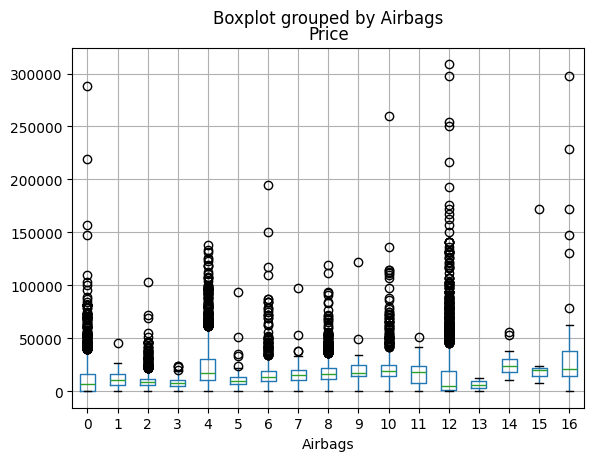

In [5]:
cars_df.boxplot(column = 'Price', by = 'Airbags')

не смотря на то что график показывает выбросы (на самом деле стало гораздо лучше чем было). По медиане видно, что цена имеет прямопропорцианальную зависимость от количества подушек безопасности 

<Axes: xlabel='Price', ylabel='Mileage'>

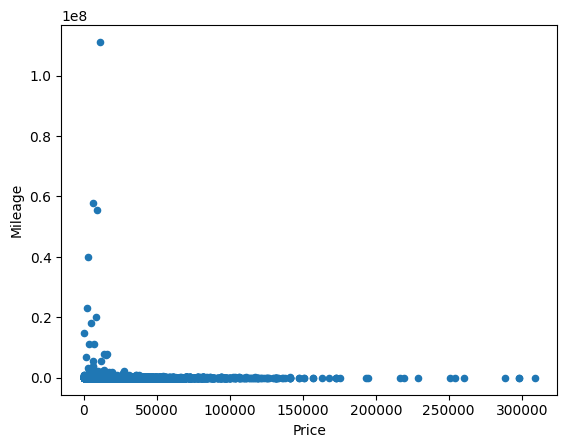

In [6]:
cars_df.plot.scatter(x='Price', y='Mileage')

по графику видна обратно пропорциональная цены у машин и пробега машин. Также виден факт, что у всех дорогих машин нет большого пробега

<Axes: xlabel='Prod. year', ylabel='Price'>

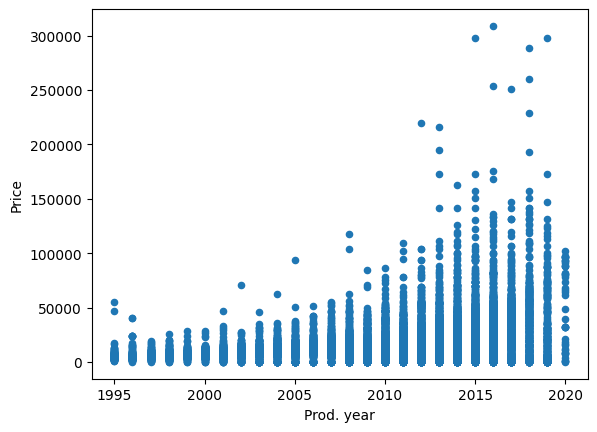

In [7]:
cars_df.plot.scatter(x ='Prod. year', y='Price')

По графику видно, что цена зависит от года производства машины прямо пропорциональная (имею ввиду чем больше год тем больше цена)

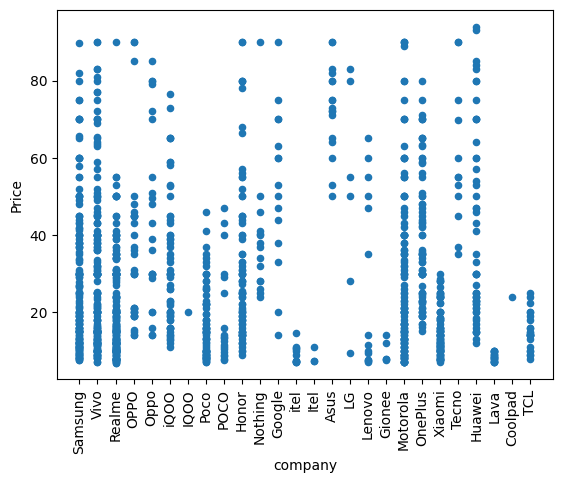

In [8]:
import matplotlib.pyplot as plt

phones_df.plot.scatter(x='company', y='Price')
plt.xticks(rotation=90)
plt.show()

На графике можно проследить зависимость цены от компании производителя

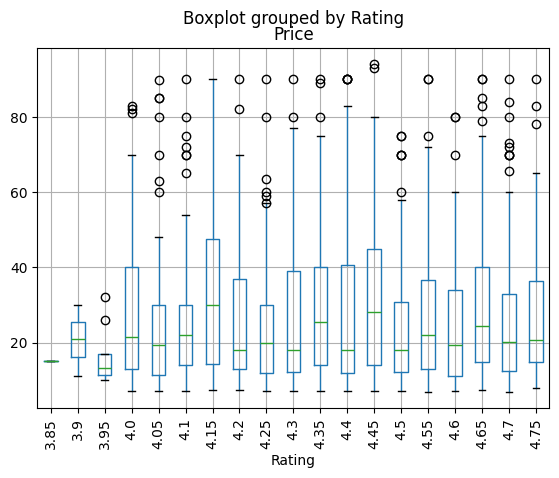

In [9]:
phones_df.boxplot(column='Price', by='Rating')
plt.xticks(rotation=90)
plt.show()

По графику можно сказать, рейтинг (насколько телефон понравился пользователям) не зависит напрямую от цены

<Axes: xlabel='Price', ylabel='Ram'>

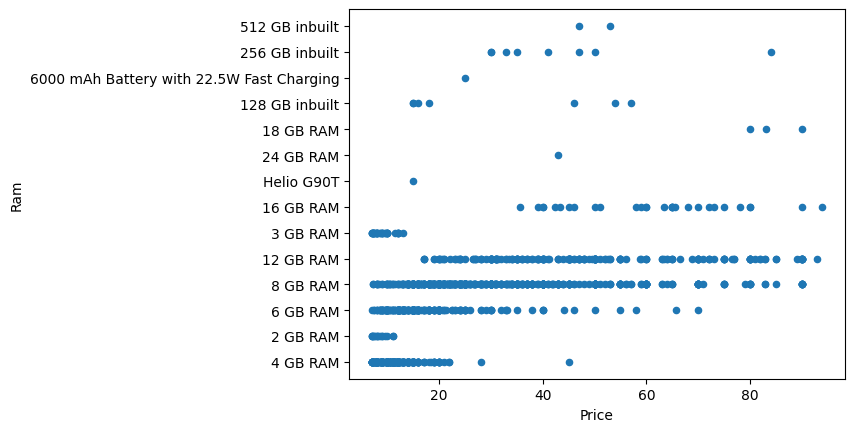

In [10]:
phones_df.plot.scatter(x='Price', y='Ram')

<Axes: xlabel='Age', ylabel='Networth'>

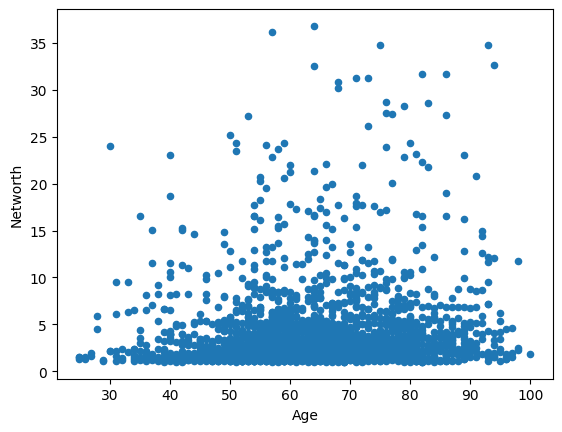

In [11]:
rich_df.plot.scatter(x='Age', y='Networth')

По графику можно понять, что основная часть миллиардеров - это люди старше сорока лет (зависимость состояния от возраста)

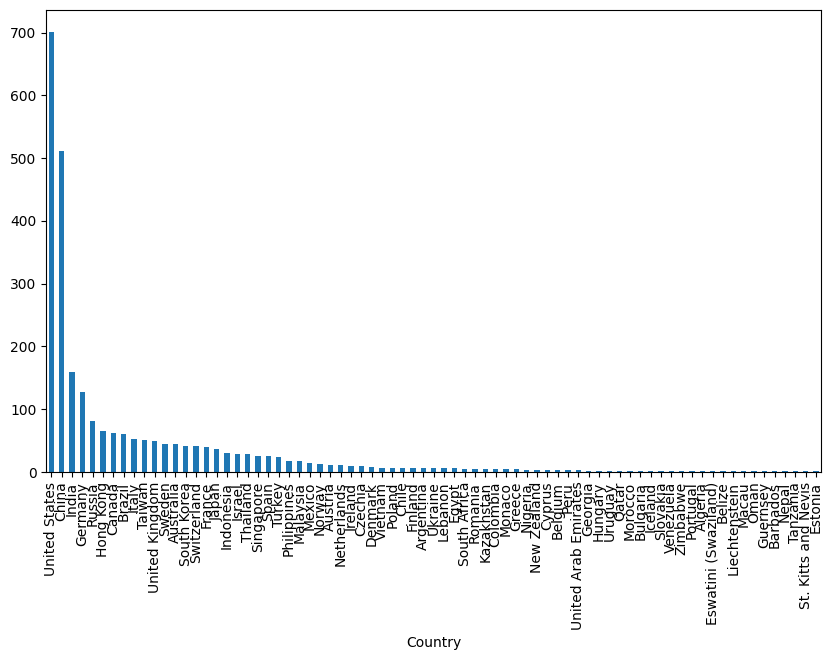

In [12]:
country_counts = rich_df['Country'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.show()

По графику можно увидеть сколько миллиардеров проживают в разных странах и сделать вывод о зависимости шанса становления миллиардеровм от страны проживания.

<Axes: xlabel='Industry'>

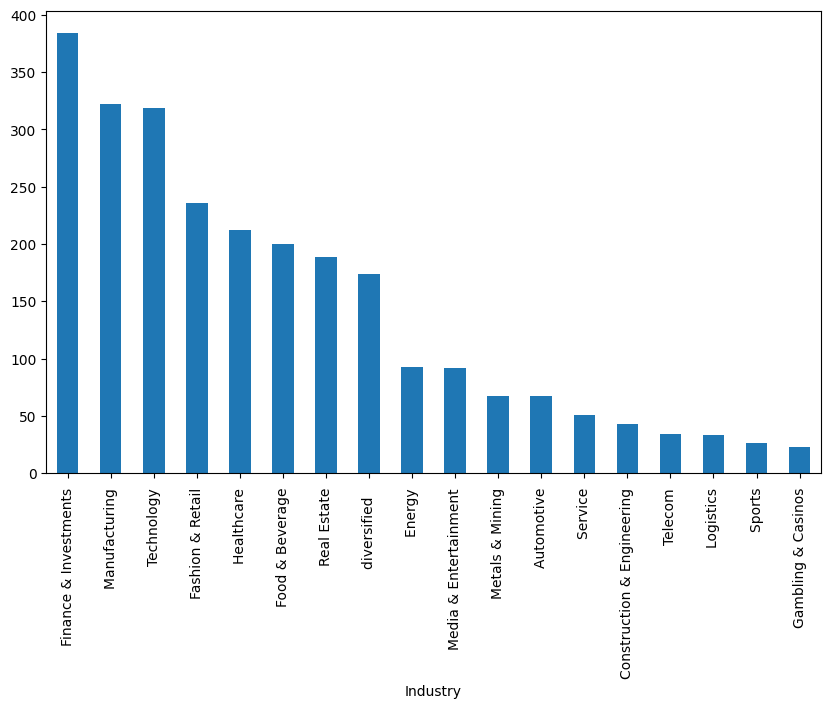

In [13]:
country_counts = rich_df['Industry'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')

На графике можно проследить зависимость индустрии от кол-ва миллиардеров

8.
На мой взгляд наборы довольно информативные учитывая кол-во строк и атрибутов. 
Степень покрытия, соответсвие реальным данным и согласованность меток проверить не представляется возможным (но я верю составителям сетов)

9.
Проверка на пропущенные значения:

In [14]:
print(cars_df.isnull().sum().loc[lambda x: x>0])
print("--------------")
print(phones_df.isnull().sum().loc[lambda x: x>0])
print("--------------")
print(rich_df.isnull().sum().loc[lambda x: x>0])

Series([], dtype: int64)
--------------
Android_version      404
Inbuilt_memory        18
fast_charging         82
Screen_resolution      2
Processor             25
dtype: int64
--------------
Series([], dtype: int64)


в датасете с телефонами нашлись пустые значения. Жаль, но они все не числовые, поэтому просто заменим на моду

In [20]:
columns = ["Android_version", "Inbuilt_memory", "fast_charging", "Screen_resolution", "Processor"]
for column in columns:
    mode = phones_df[column].mode()[0]
    phones_df[column].fillna(mode, inplace=True)
    
print(phones_df.isnull().sum().loc[lambda x: x>0])

Series([], dtype: int64)


Не знаю насколько это правильно и как отразиться на качестве данных, но удалять 400+ строк их 1300 явно было бы хуже

10. 
Разбиение данных на выборки

In [21]:
from sklearn.model_selection import train_test_split

cars_train_df, cars_temp_df = train_test_split(cars_df, test_size=0.3, random_state=52)
cars_val_df, cars_test_df = train_test_split(cars_temp_df, test_size=0.5, random_state=52)

phones_train_df, phones_temp_df = train_test_split(phones_df, test_size=0.3, random_state=52)
phones_val_df, phones_test_df = train_test_split(phones_temp_df, test_size=0.5, random_state=52)

rich_train_df, rich_temp_df = train_test_split(rich_df, test_size=0.3, random_state=52)
rich_val_df, rich_test_df = train_test_split(rich_temp_df, test_size=0.5, random_state=52)

print(cars_df.shape[0], cars_train_df.shape[0], cars_test_df.shape[0], cars_val_df.shape[0])
print(cars_val_df.shape[0] + cars_test_df.shape[0] + cars_train_df.shape[0])
print('\n', phones_df.shape[0], phones_train_df.shape[0], phones_test_df.shape[0], phones_val_df.shape[0])
print(phones_val_df.shape[0] + phones_test_df.shape[0] + phones_train_df.shape[0])
print('\n', rich_df.shape[0], rich_train_df.shape[0], rich_test_df.shape[0], rich_val_df.shape[0])
print(rich_val_df.shape[0] + rich_test_df.shape[0] + rich_train_df.shape[0])

18712 13098 2807 2807
18712

 1282 897 193 192
1282

 2565 1795 385 385
2565


Данные были разбиты на обучающую, тестовую и контрольную выборки в отношении 70%-15%-15%

11. Взял проценты из лекции, наверное это сбалансированно

In [22]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
cars_df['old_type'] = pd.cut(cars_df['Prod. year'], bins=[1900, 2004, 2015, 2025], 
                             labels=['Old', 'Normal', 'New'])

y = cars_df['old_type']
x = cars_df.drop(columns=['Prod. year', 'old_type'])

oversampler = RandomOverSampler(random_state=52)
x_resampled, y_resampled = oversampler.fit_resample(x, y)

undersampler = RandomUnderSampler(random_state=52)
x_resampled_under, y_resampled_under = undersampler.fit_resample(x, y)

print("oversampling:")
print(pd.Series(y_resampled).value_counts())

print("undersampling:")
print(pd.Series(y_resampled_under).value_counts())

oversampling:
old_type
Old       13190
Normal    13190
New       13190
Name: count, dtype: int64
undersampling:
old_type
Old       2274
Normal    2274
New       2274
Name: count, dtype: int64


In [23]:
phones_df['rating_type'] = pd.cut(phones_df['Rating'], bins=[0, 4.0, 4.5, 5.0], 
                             labels=["bad", "normal", "good"])

y = phones_df['rating_type']
x = phones_df.drop(columns=['Rating', 'rating_type'])

oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x, y)

undersampler = RandomUnderSampler(random_state=42)
x_resampled_under, y_resampled_under = undersampler.fit_resample(x, y)

print("oversampling:")
print(pd.Series(y_resampled).value_counts())

print("undersampling:")
print(pd.Series(y_resampled_under).value_counts())

oversampling:
rating_type
bad       784
normal    784
good      784
Name: count, dtype: int64
undersampling:
rating_type
bad       91
normal    91
good      91
Name: count, dtype: int64


oversampling:
age_type
young    1535
grown    1535
old      1535
Name: count, dtype: int64
undersampling:
age_type
young    14
grown    14
old      14
Name: count, dtype: int64


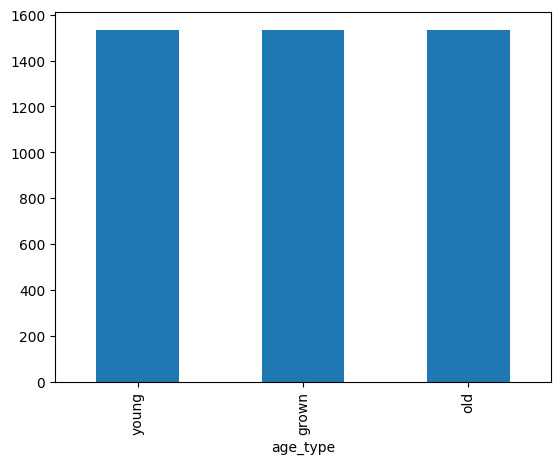

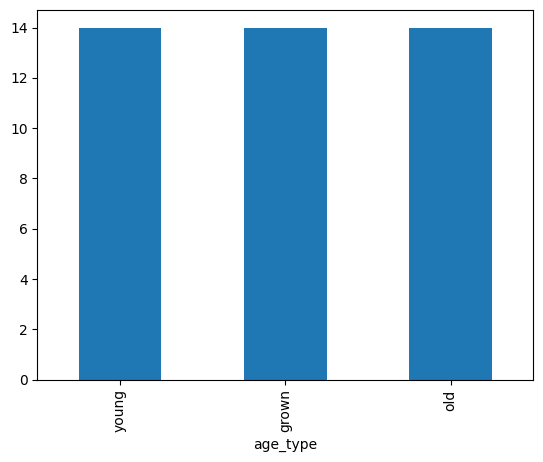

In [24]:
rich_df['age_type'] = pd.cut(rich_df['Age'], bins=[0, 30, 60, 100], 
                             labels=["young", "grown", "old"])

y = rich_df['age_type']
x = rich_df.drop(columns=['Age', 'age_type'])

oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x, y)

undersampler = RandomUnderSampler(random_state=42)
x_resampled_under, y_resampled_under = undersampler.fit_resample(x, y)

print("oversampling:")
print(pd.Series(y_resampled).value_counts())

print("undersampling:")
print(pd.Series(y_resampled_under).value_counts())

y_resampled.value_counts().plot(kind='bar')
plt.show()
y_resampled_under.value_counts().plot(kind='bar')
plt.show()
